# BEE 4750 Homework 4: Linear Programming and Capacity Expansion

**Name**: MacKenzie Fountain

**ID**: 5362163

> **Due Date**
>
> Thursday, 11/07/23, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to formulate and solve a resource allocation
    problem using linear programming.
-   Problem 2 asks you to formulate, solve, and analyze a standard
    generating capacity expansion problem.
-   Problem 3 (5750 only) asks you to add a CO<sub>2</sub> constraint to
    the capacity expansion problem and identify changes in the resulting
    solution.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [3]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw4-grape`


In [4]:
using JuMP
using HiGHS
using DataFrames
using Plots
using Measures
using CSV
using MarkdownTables

In [5]:
2900*.36
3800*.36-70
4400*.36-70
3500*.27
4100*.27-70
4200*.27-70
5900*.22
6700*.22-70
7900*.22-70

1668.0

## Problems (Total: 50/60 Points)

### Problem 1 (20 points)

A farmer has access to a pesticide which can be used on corn, soybeans,
and wheat fields, and costs \$70/ha-yr to apply. The crop yields the
farmer can obtain following crop yields by applying varying rates of
pesticides to the field are shown in
<a href="#tbl-yields" class="quarto-xref">Table 1</a>.

| Application Rate (kg/ha) | Soybean (kg/ha) | Wheat (kg/ha) | Corn (kg/ha) |
|:------------------------:|:---------------:|:-------------:|:------------:|
|            0             |      2900       |     3500      |     5900     |
|            1             |      3800       |     4100      |     6700     |
|            2             |      4400       |     4200      |     7900     |

Table 1: Crop yields from applying varying pesticide rates for Problem
1.

The costs of production, *excluding pesticides*, for each crop, and
selling prices, are shown in
<a href="#tbl-costs" class="quarto-xref">Table 2</a>.

|   Crop   | Production Cost (\$/ha-yr) | Selling Price (\$/kg) |
|:--------:|:--------------------------:|:---------------------:|
| Soybeans |            350             |         0.36          |
|  Wheat   |            280             |         0.27          |
|   Corn   |            390             |         0.22          |

Table 2: Costs of crop production, excluding pesticides, and selling
prices for each crop.

Recently, environmental authorities have declared that farms cannot have
an *average* application rate on soybeans, wheat, and corn which exceeds
0.8, 0.7, and 0.6 kg/ha, respectively. The farmer has asked you for
advice on how they should plant crops and apply pesticides to maximize
profits over 130 total ha while remaining in regulatory compliance if
demand for each crop (which is the maximum the market would buy) this
year is 250,000 kg?

**In this problem**:

-   Formulate a linear program for this resource allocation problem,
    including clear definitions of decision variable(s) (including
    units), objective function(s), and constraint(s) (make sure to
    explain functions and constraints with any needed derivations and
    explanations). **Tip: Make sure that all of your constraints are
    linear**.
-   Implement the program in `JuMP.jl` and find the solution. How many
    ha should the farmer dedicate to each crop and with what pesticide
    application rate(s)? How much profit will the farmer expect to make?
-   The farmer has an opportunity to buy an extra 10 ha of land. How
    much extra profit would this land be worth to the farmer? Discuss
    why this value makes sense and whether you would recommend the
    farmer should make the purchase.


In [6]:
m = Model(HiGHS.Optimizer)

@variable(m, S[0:2] >= 0)
@variable(m, W[0:2] >= 0)
@variable(m, C[0:2] >= 0)

@objective(m, Max, 1044S[0]+1298S[1]+1514S[2]+945W[0]+1037W[1]+1064W[2]+1298C[0]+1404C[1]+1668C[2])

#cannot grow more crops than demand, will not sell crops over 250000kg
@constraint(m, (2900*S[0]+3800*S[1]+4400*S[2]) <= 250000) 
@constraint(m, (3500*W[0]+4100*W[1]+4200*W[2]) <= 250000) 
@constraint(m, (5900*C[0]+6700*C[1]+7900*C[2]) <= 250000) 

#Optimizing crops to not exceed 130 ha
@constraint(m, S[0]+S[1]+S[2]+W[0]+W[1]+W[2]+C[0]+C[1]+C[2] <= 130) 

#Cannot exceed environmental regulations for pesticide
@constraint(m, S[1] + 2 * S[2] <= 0.8 * (S[1] + S[2] + S[0]))
@constraint(m, W[1] + 2 * W[2] <= 0.7 * (W[1] + W[2] + W[0]))
@constraint(m, C[1] + 2 * C[2] <= 0.6 * (C[1] + C[2] + C[0]))

-0.6 C[0] + 0.4 C[1] + 1.4 C[2] ≤ 0

In [166]:
optimize!(m)
@show value.(S)
#@show value.(W)
#@show value.(C)

Coefficient ranges:
  Matrix [2e-01, 8e+03]
  Cost   [9e+02, 2e+03]
  Bound  [0e+00, 0e+00]
  RHS    [1e+02, 2e+05]
Solving LP without presolve, or with basis, or unconstrained
Model   status      : Optimal
Objective value     :  1.6301388270e+05
HiGHS run time      :          0.00


### Profit

In [9]:
#calculate profit
objective_value(m)@show ;

objective_value(m) = 163013.88270293243


In [167]:
t = Model(HiGHS.Optimizer)

@variable(t, S[0:2] >= 0)
@variable(t, W[0:2] >= 0)
@variable(t, C[0:2] >= 0)

@objective(t, Max, 1044S[0]+1298S[1]+1514S[2]+945W[0]+1037W[1]+1064W[2]+1298C[0]+1404C[1]+1668C[2])

#cannot grow more crops than demand, will not sell crops over 250000kg
@constraint(t, (2900*S[0]+3800*S[1]+4400*S[2]) <= 250000) 
@constraint(t, (3500*W[0]+4100*W[1]+4200*W[2]) <= 250000) 
@constraint(t, (5900*C[0]+6700*C[1]+7900*C[2]) <= 250000) 

#Optimizing crops to not exceed 130 ha
@constraint(t, S[0]+S[1]+S[2]+W[0]+W[1]+W[2]+C[0]+C[1]+C[2] <= 140) 

#Cannot exceed environmental regulations for pesticide
@constraint(t, S[1] + 2 * S[2] <= 0.8 * (S[1] + S[2] + S[0]))
@constraint(t, W[1] + 2 * W[2] <= 0.7 * (W[1] + W[2] + W[0]))
@constraint(t, C[1] + 2 * C[2] <= 0.6 * (C[1] + C[2] + C[0]))

-0.6 C[0] + 0.4 C[1] + 1.4 C[2] ≤ 0

In [169]:
optimize!(t)
#@show value.(S)
#@show value.(W)
#@show value.(C)

Coefficient ranges:
  Matrix [2e-01, 8e+03]
  Cost   [9e+02, 2e+03]
  Bound  [0e+00, 0e+00]
  RHS    [1e+02, 2e+05]
Solving LP without presolve, or with basis, or unconstrained
Model   status      : Optimal
Objective value     :  1.7310788270e+05
HiGHS run time      :          0.00


### Additional Profit

In [160]:
AdditionalProfit = objective_value(t) - objective_value(m)

10094.0

### Results

I would not recommned the farmer buy this land, but he is still making profit. Amount of land is directly linearly proportional to the amount of profit. Depending on how much it cost to purchase a ha of land, it could be detrmintal. For 1 ha of land hte profit increase is abou $1000, over time that would make money, but there are other factors to consisder like demand of crops over the next few year, changing environmental regulations, and other factors liek weather. Based on this, the investment most likely won't be worth the costs.


### Problem 2 (30 points)

For this problem, we will use hourly load (demand) data from 2013 in New
York’s Zone C (which includes Ithaca). The load data is loaded and
plotted below in <a href="#fig-demand" class="quarto-xref">Figure 1</a>.

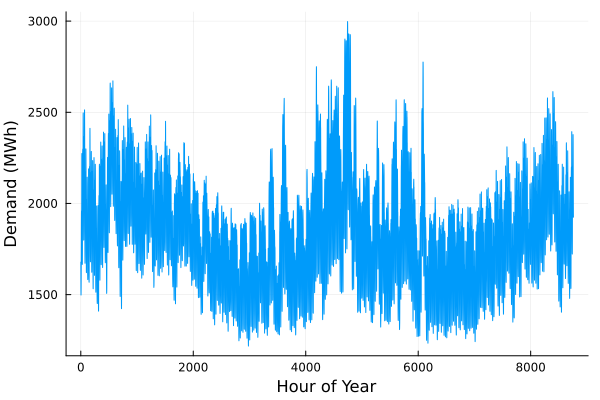

In [13]:
# load the data, pull Zone C, and reformat the DataFrame
NY_demand = DataFrame(CSV.File("data/2013_hourly_load_NY.csv"))
rename!(NY_demand, :"Time Stamp" => :Date)
demand = NY_demand[:, [:Date, :C]]
rename!(demand, :C => :Demand)
demand[:, :Hour] = 1:nrow(demand)

# plot demand
plot(demand.Hour, demand.Demand, xlabel="Hour of Year", ylabel="Demand (MWh)", label=:false)

Next, we load the generator data, shown in
<a href="#tbl-generators" class="quarto-xref">Table 3</a>. This data
includes fixed costs (\$/MW installed), variable costs (\$/MWh
generated), and CO<sub>2</sub> emissions intensity (tCO<sub>2</sub>/MWh
generated).

In [14]:
gens = DataFrame(CSV.File("data/generators.csv"))

6×4 DataFrame
 Row │ Plant       FixedCost  VarCost  Emissions 
     │ String15    Int64      Int64    Float64   
─────┼───────────────────────────────────────────
   1 │ Geothermal     450000        0       0.0
   2 │ Coal           220000       24       1.0
   3 │ NG CCGT         82000       30       0.43
   4 │ NG CT           65000       40       0.55
   5 │ Wind            91000        0       0.0
   6 │ Solar           70000        0       0.0

Finally, we load the hourly solar and wind capacity factors, which are
plotted in <a href="#fig-cf" class="quarto-xref">Figure 2</a>. These
tell us the fraction of installed capacity which is expected to be
available in a given hour for generation (typically based on the average
meteorology).

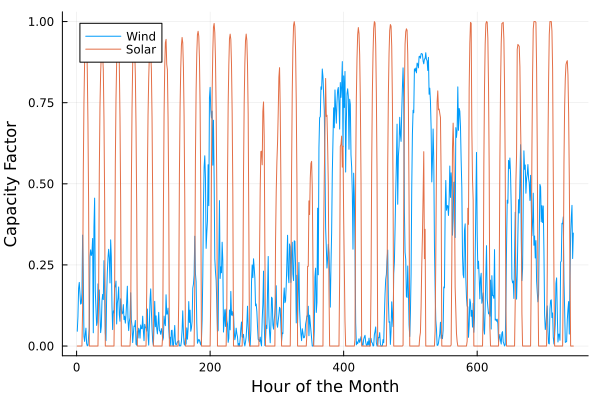

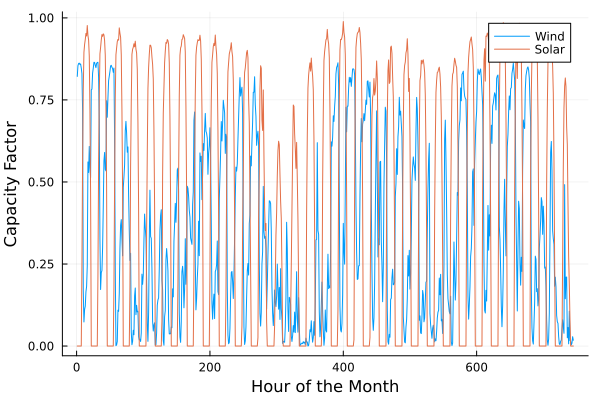

In [15]:
# load capacify factors into a DataFrame
cap_factor = DataFrame(CSV.File("data/wind_solar_capacity_factors.csv"))

# plot January capacity factors
p1 = plot(cap_factor.Wind[1:(24*31)], label="Wind")
plot!(cap_factor.Solar[1:(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

p2 = plot(cap_factor.Wind[4344:4344+(24*31)], label="Wind")
plot!(cap_factor.Solar[4344:4344+(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

display(p1)
display(p2)

You have been asked to develop a generating capacity expansion plan for
the utility in Riley County, NY, which currently has no existing
electrical generation infrastructure. The utility can build any of the
following plant types: geothermal, coal, natural gas combined cycle gas
turbine (CCGT), natural gas combustion turbine (CT), solar, and wind.

While coal, CCGT, and CT plants can generate at their full installed
capacity, geothermal plants operate at maximum 85% capacity, and solar
and wind available capacities vary by the hour depend on the expected
meteorology. The utility will also penalize any non-served demand at a
rate of \$10,000/MWh.

**In this problem**:

-   Formulate a linear program for this capacity expansion problem,
    including clear definitions of decision variable(s) (including
    units), objective function(s), and constraint(s) (make sure to
    explain functions and constraints with any needed derivations and
    explanations).
-   Implement your linear program in `JuMP.jl`. Find the optimal
    solution. How much should the utility build of each type of
    generating plant? What will the total cost be? How much energy will
    be non-served?
-   What fraction of annual generation does each plant type produce? How
    does this compare to the breakdown of built capacity that you found
    in Problem 1.5? Do these results make sense given the generator
    data?
-   Make a plot of the electricity price in each hour. Discuss any
    trends that you see.



In [121]:
# define sets
G = 1:nrow(gens[1:end, :])
T = 1:nrow(demand)
NSECost = 10000;


In [122]:

RC_model = Model(HiGHS.Optimizer)
# define variables
@variables(RC_model, begin
    x[g in G] >= 0
    y[g in G, t in T] >= 0
    NSE[t in T] >= 0
end)

@objective(RC_model, Min, 
    sum(gens[G, :FixedCost] .* x) + sum(gens[G, :VarCost] .* sum(y[:, t] for t in T)) + NSECost * sum(NSE)
)

@constraint(RC_model, load[t in T], sum(y[:, t]) + NSE[t] >= demand.Demand[t])
@constraint(RC_model, availability[g in G, t in T], y[g, t] <= x[g])

c = Matrix(cap_factor[:, [:Wind, :Solar]]) 
# Define the Wind and Solar generators
gens_WS = [5, 6]

# Apply capacity constraints only to generators 5 and 6
for g in gens_WS
    row_index = g - 4  # Adjust based on how you mapped generators to the capacity factors
    for t in T
        # Ensure to access the correct column based on the generator
        column_index = (g == 5) ? 1 : 2  # Column 1 for Wind (g=5), Column 2 for Solar (g=6)
        
        @constraint(RC_model, 
            y[g, t] <= x[g] * c[t, column_index])  # Use the correct row t and column index
    end
end



In [125]:
optimize!(RC_model)#


Coefficient ranges:
  Matrix [5e-05, 1e+00]
  Cost   [2e+01, 4e+05]
  Bound  [0e+00, 0e+00]
  RHS    [1e+03, 3e+03]
Solving LP without presolve, or with basis, or unconstrained
Model   status      : Optimal
Objective value     :  6.5458487038e+08
HiGHS run time      :          0.04


### Generator values: Geothermal, Coal, NG CCGT, NG CT, Wind, Solar

In [143]:
@show value.(x);

value.(x) = 1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:6
And data, a 6-element Vector{Float64}:
   -0.0
    0.0
 1658.4514133074133
  879.7538120149645
  484.946167110047
 1957.6424239086684


### Total Costs

In [170]:

objective_value(RC_model)


6.545848703815941e8

### NSE Values

In [144]:

# Print the values of NSE that are not zero
for i in 1:length(NSE)  # Assuming NSE is a vector of indices
    nse_value = value(NSE[i])
    if nse_value != 0
        println(nse_value)  # Use println for better formatting
    end
end

71.1393039894374
84.75086720438048
16.063002495307046
36.99886784555201
32.2586347532083
15.623098139500598


##### Fractions of Generation: Geothermal, Coal, NG CCGT, NG CT, Wind, Solar

In [146]:
Total= 1658.4514133074133+ 879.7538120149645+ 484.946167110047+ 1957.6424239086684
Fractions=[0,0,1658.45/Total,879.75/Total,484.95/Total,1957.64/Total]

6-element Vector{Float64}:
 0.0
 0.0
 0.332969012802522
 0.17662847177365537
 0.09736399816610875
 0.39303775104629574

### Results

These results do make sense with this model. The capacity of wind power (based on the capacity graph) doesn't show high effeicency, yet it is more than geothermal and coal. Geothermal and coal had higher fixed costs, so that must be the deciding factor on why they don't have a percentage of genrated power. Solar is the most prevelant source, even at 85% capacity, it is not costly once the intial construction is completed. NG CT is relatively costly to construct and operated, yet it still has a higher percentage than Wind that costs nothing to operate (based on the model). The capacity of Wind is the deciding factor of this.

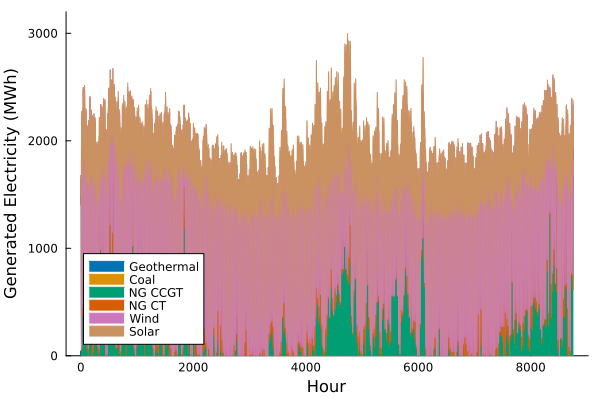

In [147]:
p = areaplot(value.(y).data', 
    label=permutedims(gens.Plant), 
    xlabel = "Hour", 
    ylabel ="Generated Electricity (MWh)", 
    color_palette=:seaborn_colorblind,
    grid=:false,
    legend = :bottomleft)
ylims!(p, (0, 3200))


### Discuss

Though solar and wind have a 85% capacity, they are still the most ultilized. Geothermal and coal are not included in the graph, which is suprising, but that shows their costs outweigh their generated elecitricty in the decisoin making process.

## References

ChatGPT was used to debug an indexing error on Q2, when applying the capacitpy constraint and printing the non-zero NSE values.